In [1]:
# Import required libraries
# For mathematical computation


import numpy as np
import pandas as pd

# For data visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\Quantum Analytics Files\Python Files\Python Assignment\Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [4]:
# Checking the shape of the data

df.shape

(1074, 10)

In [5]:
# Checking the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
# Checking the missing values

df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

## DATA CLEANING AND MANIPULATION

In [7]:
# Evaluation of Data

# Define a function to convert M and B to millions and billions respectivey
# Writting the functions below:

def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1])* 1e6
    elif x[-1] == 'B':
        return float(x[:-1])* 1e9
    else:
        return x
    
# Convert the valuation column to float
df['Valuation'] = df['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)

# Convert the funding column to float
df['Funding'] = df['Funding'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)

# Print the updated DataFrame
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22532\4211403512.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = df['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_22532\4211403512.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
df.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [9]:
# Convert the Date Joined to datetime

df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Convert the Year Founded to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format = '%Y')

In [10]:
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [11]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [12]:
# Calculate the age of the company at the time it joined the unicorn companies
df['Age of Joining'] = ((df['Date Joined'] - df['Year Founded']).dt.days / 365).round(1)

# Print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [13]:
# Apply the ffill method to the 'CITY' and 'SELECT INVESTORS' column (For the missing values)
df['City'] = df['City'].ffill()
df['Select Investors'] = df['Select Investors'].ffill()

# Print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [14]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of Joining      0
dtype: int64

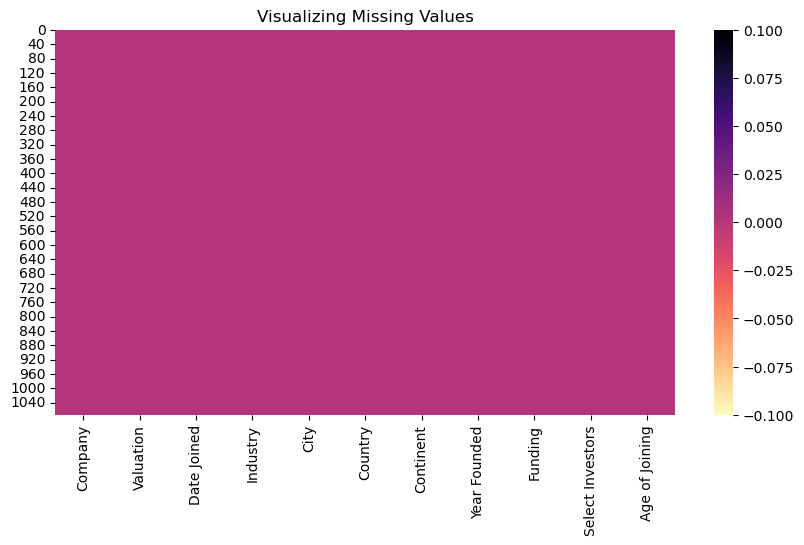

In [15]:
# visualizing the missing values

plt.figure(figsize = (10,5))
plt.title('Visualizing Missing Values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Exploratory Data Analysis: Relationships, insights and visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis

In [16]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of Joining'],
      dtype='object')

In [17]:
# Industry count per company
Ind_count = df['Industry'].value_counts().sort_values(ascending = True)
Ind_count

Artificial Intelligence                 11
Travel                                  14
Consumer & retail                       25
Edtech                                  28
Auto & transportation                   31
Hardware                                34
Mobile & telecommunications             38
Data management & analytics             41
Cybersecurity                           50
Supply chain, logistics, & delivery     57
Other                                   58
Artificial intelligence                 73
Health                                  74
E-commerce & direct-to-consumer        111
Internet software & services           205
Fintech                                224
Name: Industry, dtype: int64

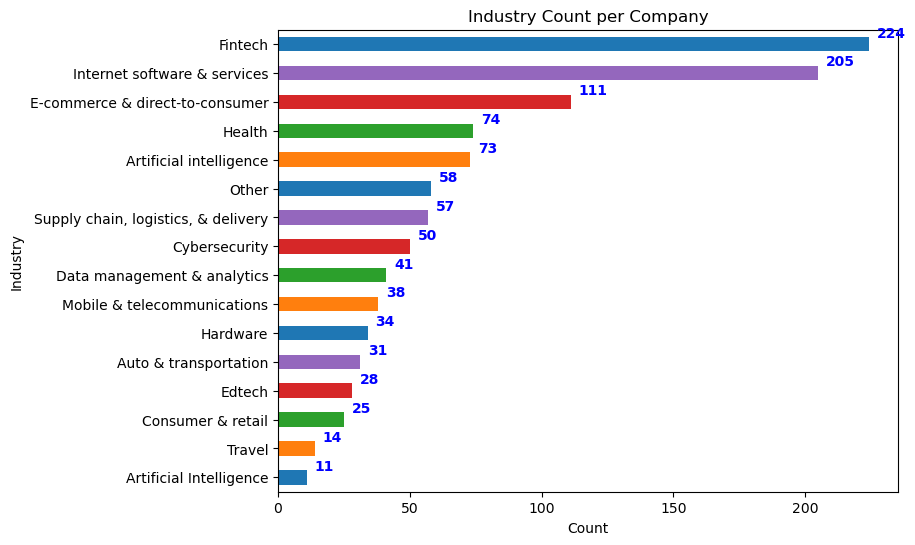

In [71]:
import matplotlib.pyplot as plt

# Define colors for each industry
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create horizontal bar chart with custom colors
fig, ax = plt.subplots(figsize=(8,6))
Ind_count.plot(kind='barh', ax=ax, color=colors)

# Add data labels
for i, v in enumerate(Ind_count):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Industry')
ax.set_title('Industry Count per Company')

plt.show()

## Observation

- As illustrated in the Horizontal Bar chart depicted above, the Fintech sector boasts the highest count, whereas the Artificial Intelligence industry exhibits the lowest count.

### Bivariate Analysis

In [19]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of Joining'],
      dtype='object')

In [20]:
# Valuation by Country

df.groupby('Country')['Valuation'].value_counts().astype('string').sort_values(ascending = True)

Country        Valuation   
Argentina      2.000000e+09    1
Singapore      4.000000e+09    1
Senegal        2.000000e+09    1
Philippines    2.000000e+09    1
               1.000000e+09    1
                              ..
France         2.000000e+09    7
China          5.000000e+09    8
United States  8.000000e+09    8
India          2.000000e+09    9
Canada         1.000000e+09    9
Name: Valuation, Length: 176, dtype: string

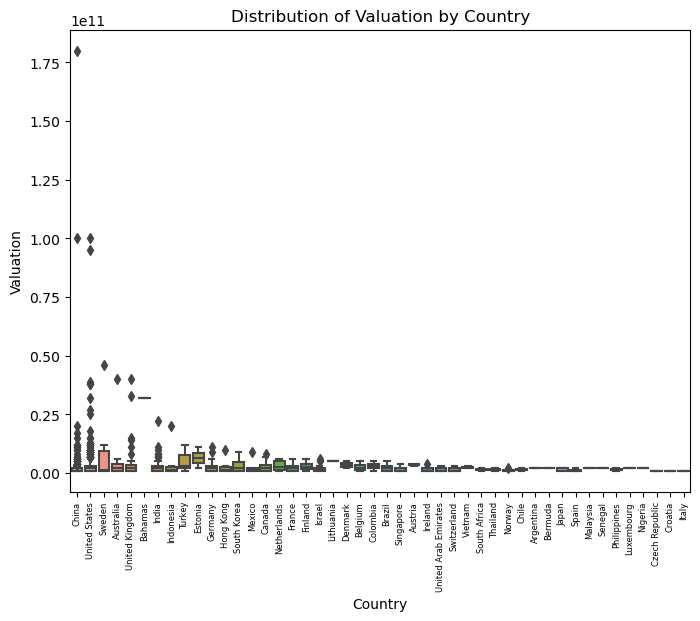

In [21]:
# Visualizing Valuation by Country
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Country'], y = df['Valuation'], data = df)
plt.title('Distribution of Valuation by Country')
plt.xticks(rotation = 90, fontsize=6)
plt.show()

## Observation

- From the Boxplot above, we can observe that Sweden has the highest Valuation by Country compared with the others, while Czech Republic, Croatia and Italy haave the lowest Valuation.

In [22]:
# Funding by Industry

df.groupby('Industry')['Funding'].value_counts().astype('string').sort_values(ascending = True)

Industry                      Funding     
Fintech                       5.460000e+08    1
Health                        5.240000e+08    1
                              5.680000e+08    1
                              5.690000e+08    1
                              5.700000e+08    1
                                             ..
Internet software & services  2.000000e+08    6
Health                        1.000000e+09    6
Auto & transportation         1.000000e+09    7
Internet software & services  1.000000e+09    7
Fintech                       2.000000e+09    8
Name: Funding, Length: 918, dtype: string

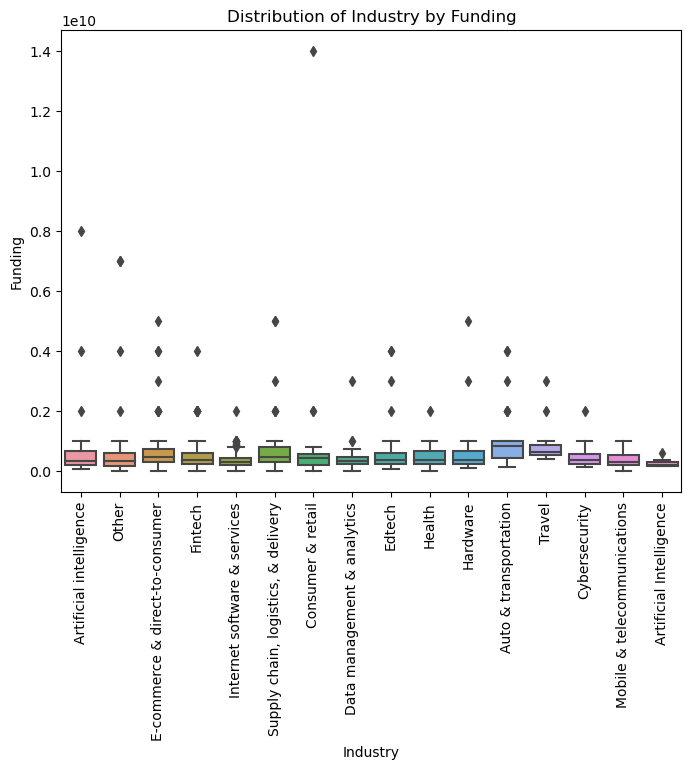

In [23]:
# visualizing Funding by Industry
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Industry'], y = df['Funding'], data = df)
plt.title('Distribution of Industry by Funding')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

## Observation

- It is observed that Auto & transportation has the highest funding median value while the Artificial Intelligence has the lowest median value.

In [24]:
# Calculate the number of investors for each company
df['Investor Count'] = df['Select Investors'].str.split(',').str.len()
 
# Sort the companies in descending order based on the number of investors
df_sorted = df.sort_values('Investor Count', ascending=False)
# Select top 5 companies with the highest number of investors.
top_companies = df_sorted.head(5)

# Perform a bivariate analysis using a cross-tabulation
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Print the cross-tabulation
print(cross_tab)

Company                                             Bytedance  Rappi  SVOLT  \
Select Investors                                                              
Andreessen Horowitz, Andreessen Horowitz, Insti...          0      0      0   
DST Global, Andreessen Horowitz, Sequoia Capita...          0      1      0   
IDG Capital, Bank Of China Group Investment,, S...          0      0      1   
Sequoia Capital China, SIG Asia Investments, Si...          1      0      0   
Sequoia Capital China, Sina Weibo, Kleiner Perk...          0      0      0   

Company                                             Skydio  Yixia  
Select Investors                                                   
Andreessen Horowitz, Andreessen Horowitz, Insti...       1      0  
DST Global, Andreessen Horowitz, Sequoia Capita...       0      0  
IDG Capital, Bank Of China Group Investment,, S...       0      0  
Sequoia Capital China, SIG Asia Investments, Si...       0      0  
Sequoia Capital China, Sina Weibo, Kle

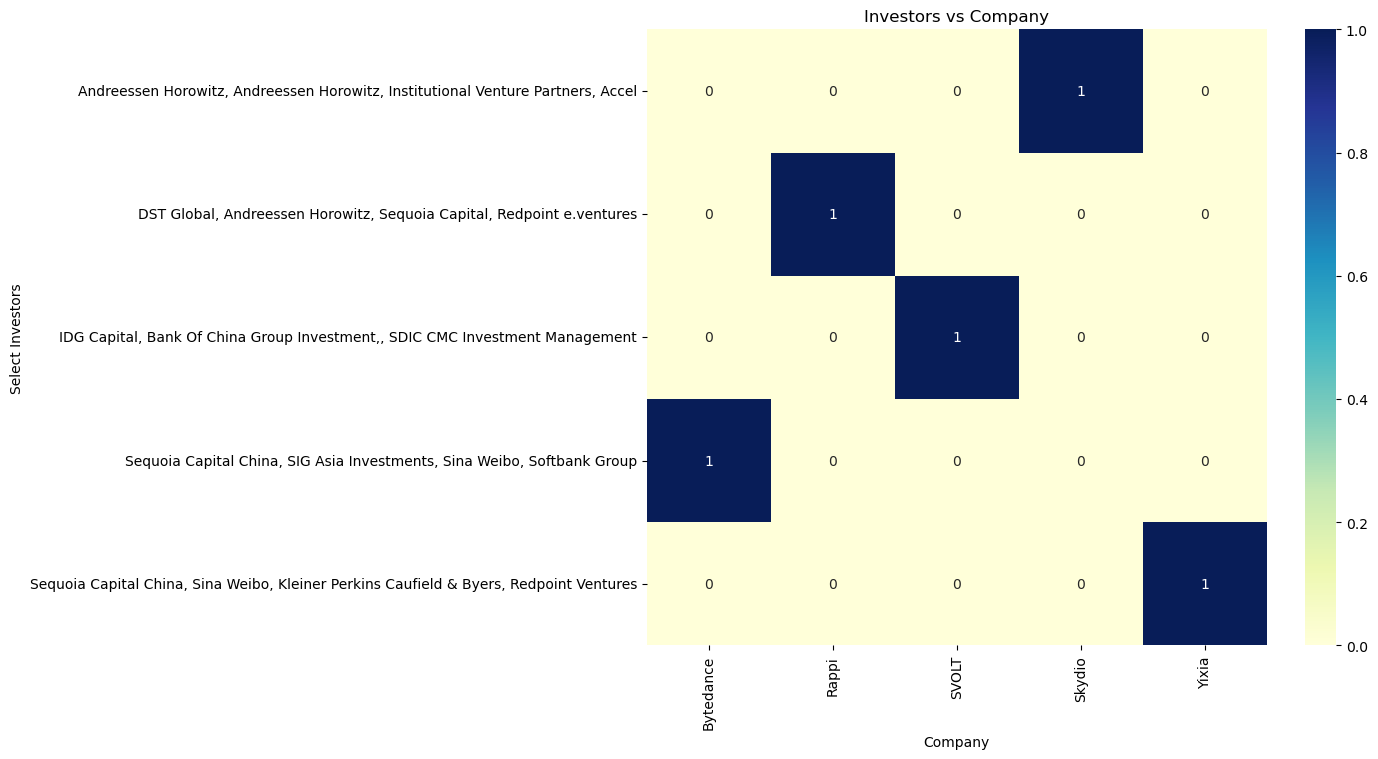

In [25]:
# A cross-tabulation of 'Select Investors' and 'Company' for top companies with the highest Investors
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Investors vs Company')
plt.xlabel('Company')
plt.ylabel('Select Investors')
plt.xticks(rotation=90)
plt.show()

## Observation

- From the Heatmap graph above, it is observed that the companies with the deep blue color have the highest number of investors while at the other hand, the companies with the yellow color have a very low/no number of investors.

In [27]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of Joining', 'Investor Count'],
      dtype='object')

In [37]:
# Top 3 Companies by Valuation
top3_comp = df.groupby('Company')['Valuation'].sum()[:3]
top3_comp

Company
1047 Games    2.000000e+09
1KMXC         1.000000e+09
1Password     7.000000e+09
Name: Valuation, dtype: float64

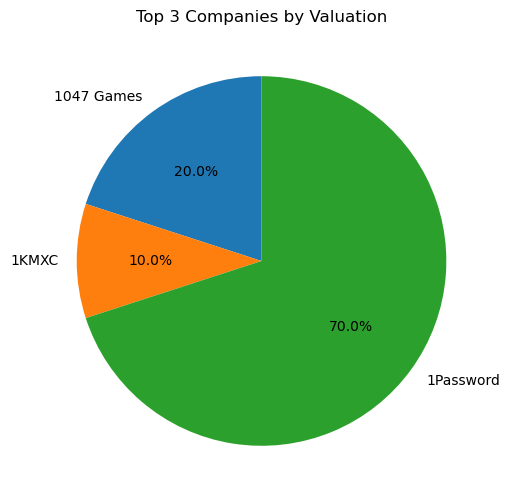

In [39]:
import matplotlib.pyplot as plt

# Top 3 Companies by Valuation
top3_comp = df.groupby('Company')['Valuation'].sum()[:3]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(top3_comp, labels=top3_comp.index, autopct='%1.1f%%', startangle=90)

# Set title
ax.set_title('Top 3 Companies by Valuation')

plt.show()

## Observation

- 1Password has the highest percentage (70%) amongst the other 2 companies, while 1KMXC has the list percentage (10%) amongst the other 2 companies.

In [40]:
# bottom 3 location by price
bot3_comp = df.groupby('Company')['Valuation'].sum().sort_values().tail(3)
bot3_comp

Company
SHEIN        1.000000e+11
SpaceX       1.000000e+11
Bytedance    1.800000e+11
Name: Valuation, dtype: float64

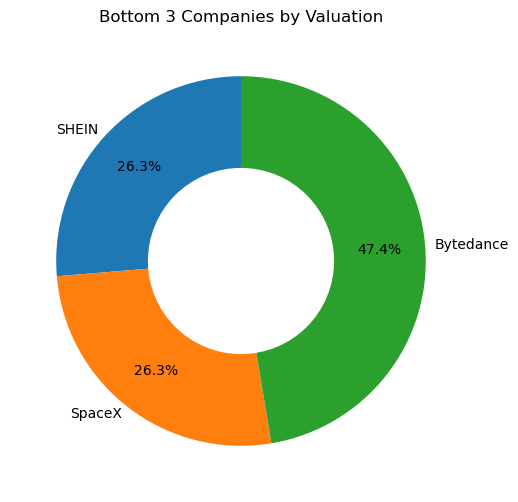

In [41]:
import matplotlib.pyplot as plt

# Bottom 3 Companies by Valuation
bot3_comp = df.groupby('Company')['Valuation'].sum().sort_values().tail(3)

# Create a donut chart
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(bot3_comp, labels=bot3_comp.index, autopct='%1.1f%%', startangle=90, pctdistance=0.75, labeldistance=1.05)
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set title
ax.set_title('Bottom 3 Companies by Valuation')

plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Age of Joining    1074 non-null   float64       
 11  Investor Count    1074 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 100.8+ KB


## Observation

- From the bottom 3 companies by valuation, Bytedance has the highest percentage of 47.4%, while Shein and SpaceX have equal amount of percentage of 26.3%.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Age of Joining    1074 non-null   float64       
 11  Investor Count    1074 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 100.8+ KB


In [44]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,Investor Count
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,4
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,3
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,3
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,3
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,3


## Multivariate Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_22532\1373181354.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_22532\1373181354.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


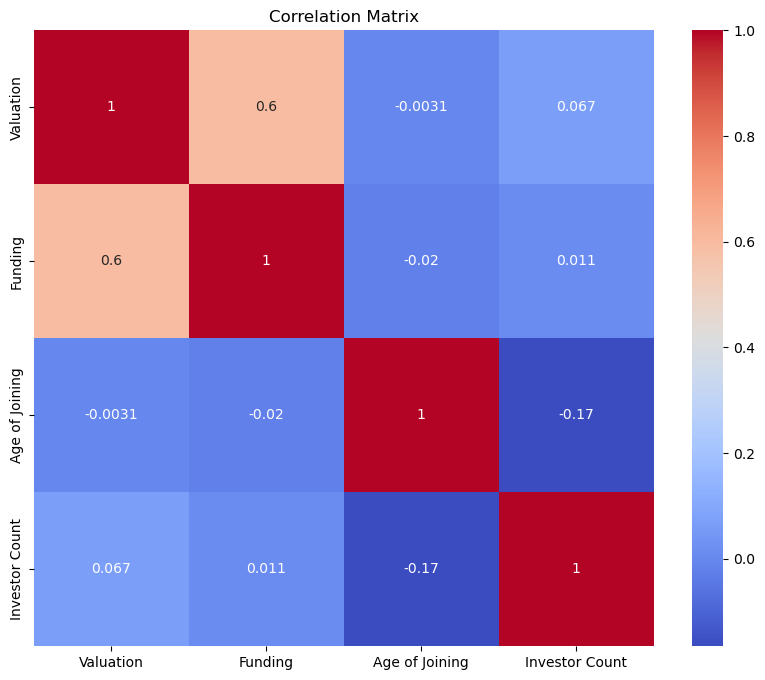

In [47]:
# calculate the correlation matrix
correlation_matrix = df.corr()
 

# visualize the correlation matrix with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
ax.set_title('Correlation Matrix')

plt.show()

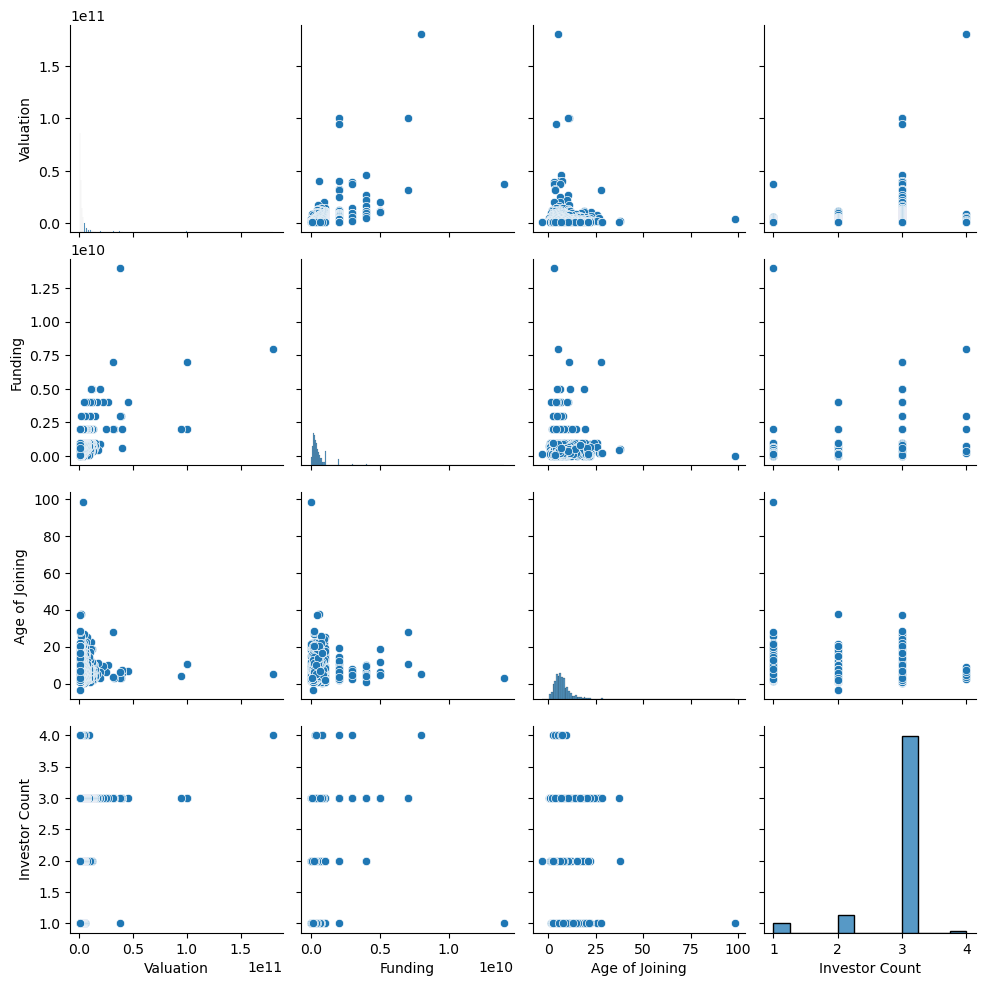

In [57]:
# Create pairplot
sns.pairplot(data=df)

# Show plot
plt.show()

## Observation

- The correlation matrix and pair plot are both tools used for analyzing the relationships between variables in a dataset. The correlation matrix provides a numerical representation of the strength and direction of the linear relationships between pairs of variables, while the pair plot provides a visual representation of those relationships through scatter plots.

In [59]:
# Get the numerical values of the dataset
num_values = df.describe()

# Display the numerical values
num_values

,Valuation,Funding,Age of Joining,Investor Count
count,1.074000e+03,1.074000e+03,1074.000000,1074.000000
mean,3.455307e+09,5.510428e+08,7.489851,2.843575
std,8.547022e+09,8.077194e+08,5.316578,0.484350
min,1.000000e+09,0.000000e+00,-3.200000,1.000000
25%,1.000000e+09,2.180000e+08,4.425000,3.000000
50%,2.000000e+09,3.650000e+08,6.500000,3.000000
75%,3.000000e+09,6.030000e+08,9.100000,3.000000
max,1.800000e+11,1.400000e+10,98.500000,4.000000


## Which unicorn companies have had the biggest return on investment?

In [63]:
# Calculate the Return on Investment(ROI) for each company
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']
df['ROI']

0       21.500000
1       13.285714
2       49.000000
3       46.500000
4       10.500000
          ...    
1069     1.638522
1070     0.010101
1071    11.500000
1072     0.262626
1073     0.612903
Name: ROI, Length: 1074, dtype: float64

In [64]:
# Get the top 10 companies with the biggest ROI
top_10_companies = df.head(10)
top_10_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,Investor Count,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,4,21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,3,13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,3,49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,3,46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,3,10.500000
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",6.0,3,68.930070
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012-01-01,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",7.3,3,19.000000
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",3.0,3,12.000000
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,1.400000e+10,Tiger Global Management,3.0,1,1.714286
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013-01-01,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates...",6.1,3,11.666667


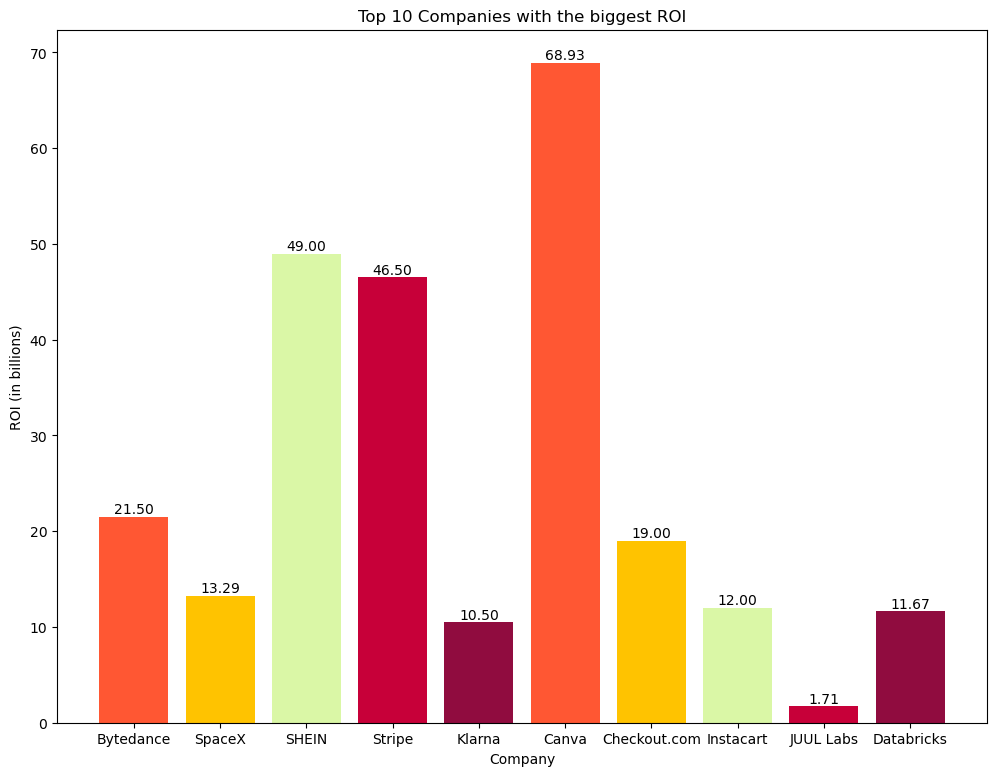

In [70]:
import matplotlib.pyplot as plt

# create a bar chart with custom colors
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']
plt.figure(figsize = (12,9))
plt.bar(top_10_companies['Company'], top_10_companies['ROI'], color=colors)

# add data labels
for i, v in enumerate(top_10_companies['ROI']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# add labels and title
plt.xlabel('Company')
plt.ylabel('ROI (in billions)')
plt.title('Top 10 Companies with the biggest ROI')

# show the plot
plt.show()

## Observation

- Based on the chart, we can see the top 10 companies with the biggest ROI, with the x-axis representing each company and the y-axis representing the ROI in billions. The data labels on top of each bar show the exact value of each ROI.

- We can observe that the company with the highest ROI is Canva, with a value of approximately 69.00 billion. The rest of the companies have ROIs ranging from 1.71 billion to 49.00 billion.

## How long does it usually take for a company to become a unicorn? Has it always been this way?

In [72]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,Investor Count,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,4,21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,3,13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,3,49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,3,46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,3,10.500000


In [73]:
# Convert the 'Year Founded' column to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'])

# Calculate the time taken for a company to become a unicorn
df['Time_to_Unicorn'] = df['Valuation'].notnull().astype(int) * (df['Valuation'].notnull().cumsum()) - df['Year Founded'].rank(method='min')


# Calculate the median time taken for a company to become a unicorn
median_time_to_unicorn = df['Time_to_Unicorn'].median()

# Group the data by year and calculate the median time taken for a company to become a unicorn each year
yearly_median_time_to_unicorn = df.groupby(df['Year Founded'].dt.year)['Time_to_Unicorn'].median()
yearly_median_time_to_unicorn

Year Founded
1919     189.0
1979     372.0
1984     697.0
1990     837.0
1991       7.0
1992     372.0
1993    1037.0
1994     116.5
1995     276.5
1996      68.0
1997    1054.0
1998     149.0
1999     595.5
2000     581.0
2001     530.0
2002     292.0
2003     185.5
2004     372.5
2005     435.5
2006     378.0
2007     476.0
2008     255.0
2009     493.0
2010     366.5
2011     339.5
2012     144.0
2013      50.0
2014      87.0
2015     -53.0
2016    -202.5
2017    -315.0
2018    -340.0
2019    -327.0
2020    -279.0
2021    -288.0
Name: Time_to_Unicorn, dtype: float64

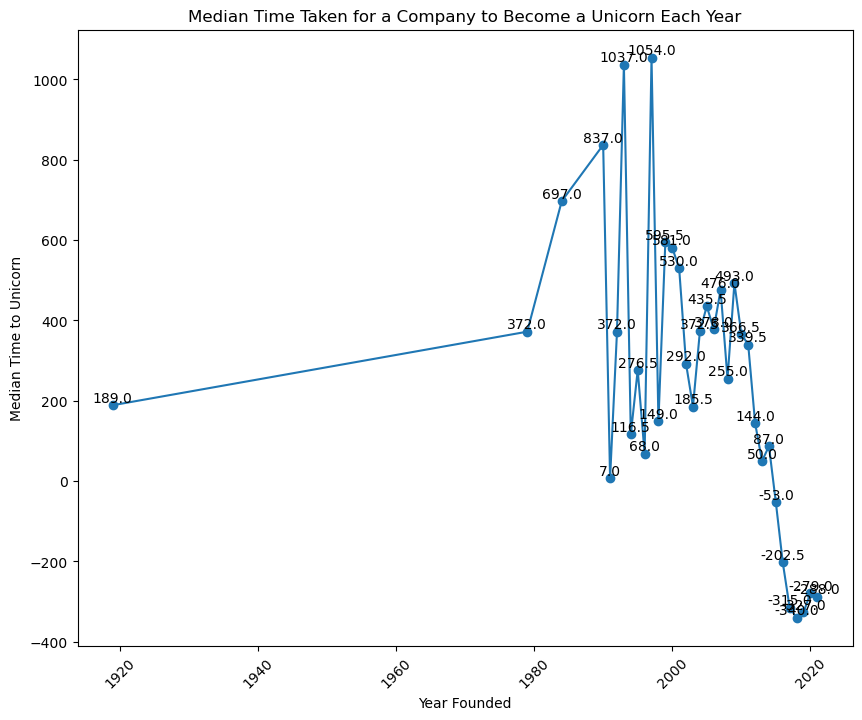

In [74]:
# Create a line plot to visualize the median time taken for a company to become a unicorn each year
plt.figure(figsize = (10,8))
plt.plot(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values, marker='o')
plt.xlabel('Year Founded')
plt.ylabel('Median Time to Unicorn')
plt.title('Median Time Taken for a Company to Become a Unicorn Each Year')
plt.xticks(rotation=45)
# Add data labels to each data point
for x, y in zip(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
plt.show()

## Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [75]:
# The data set will be grouped by Country then the number of Unicorns will be counted for each country in a descending order
country_counts = df['Country'].value_counts().sort_values(ascending=False)
country_counts

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Netherlands               6
Sweden                    6
Mexico                    6
Indonesia                 6
Hong Kong                 6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Chile                     2
Bahamas             

In [76]:
# Top 10 countries with the most unicorns
top10_countries = country_counts.head(10)
top10_countries

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

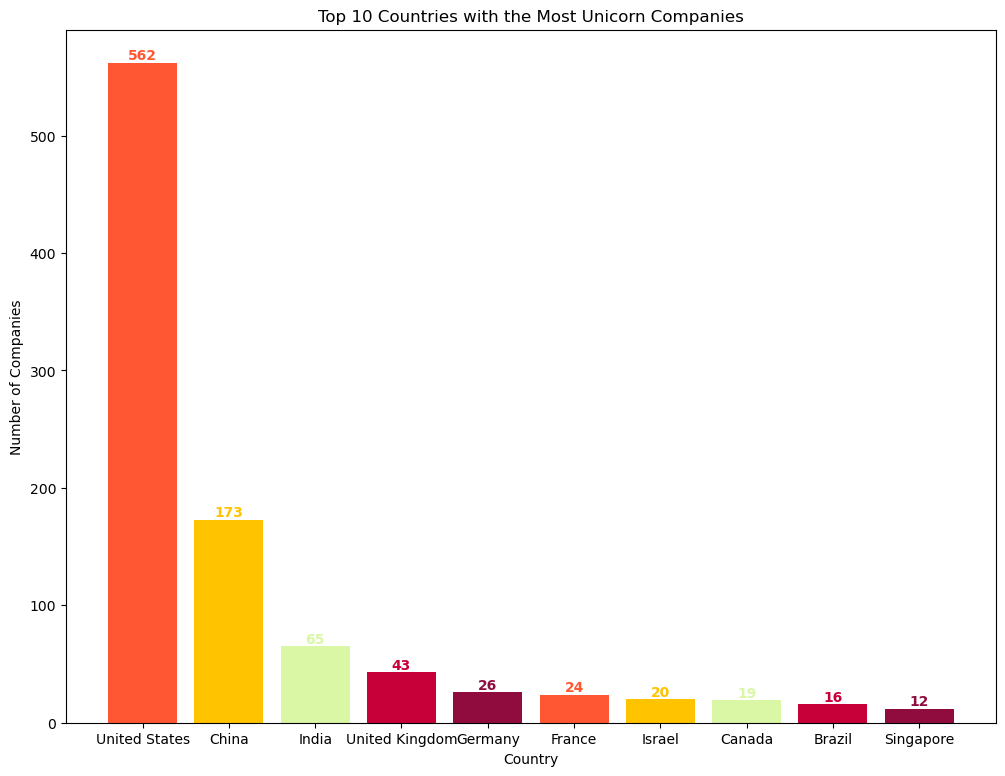

In [78]:
import matplotlib.pyplot as plt

# define custom colors for the bars
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

# create a bar chart with custom colors
plt.figure(figsize = (12,9))
plt.bar(top10_countries.index, top10_countries.values, color=colors)

# add colorful data labels
for i, v in enumerate(top10_countries.values):
    plt.text(i, v, str(v), color=colors[i], fontweight='bold', ha='center', va='bottom')

# add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.title('Top 10 Countries with the Most Unicorn Companies')

# show the plot
plt.show()

## Observation

- The x-axis represents each country and the y-axis represents the number of unicorn companies.
- The United States has the most unicorn companies, followed by China and the India.
- The rest of the countries in the top 10 have significantly fewer unicorn companies than the top 3 countries.
- The chart provides a clear and concise representation of the distribution of unicorn companies across different countries.

## Are there any cities that appear to be industry hubs?

In [80]:
# Group data by city and count the number of unicorn companies in each city
city_counts = df['City'].value_counts()

# Filter cities with a high number of unicorn companies (e.g., top 10 cities)
high_unicorn_cities = city_counts[city_counts >= 10]

# Print the cities that appear to be industry hubs
print("Cities that appear to be industry hubs:")
print(high_unicorn_cities)

Cities that appear to be industry hubs:
San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
Bengaluru         29
Shenzhen          20
Paris             19
Palo Alto         18
Berlin            18
Hangzhou          16
Boston            16
Chicago           16
Mountain View     16
Sao Paulo         12
Tel Aviv          11
San Mateo         11
Seoul             11
Redwood City      10
Name: City, dtype: int64


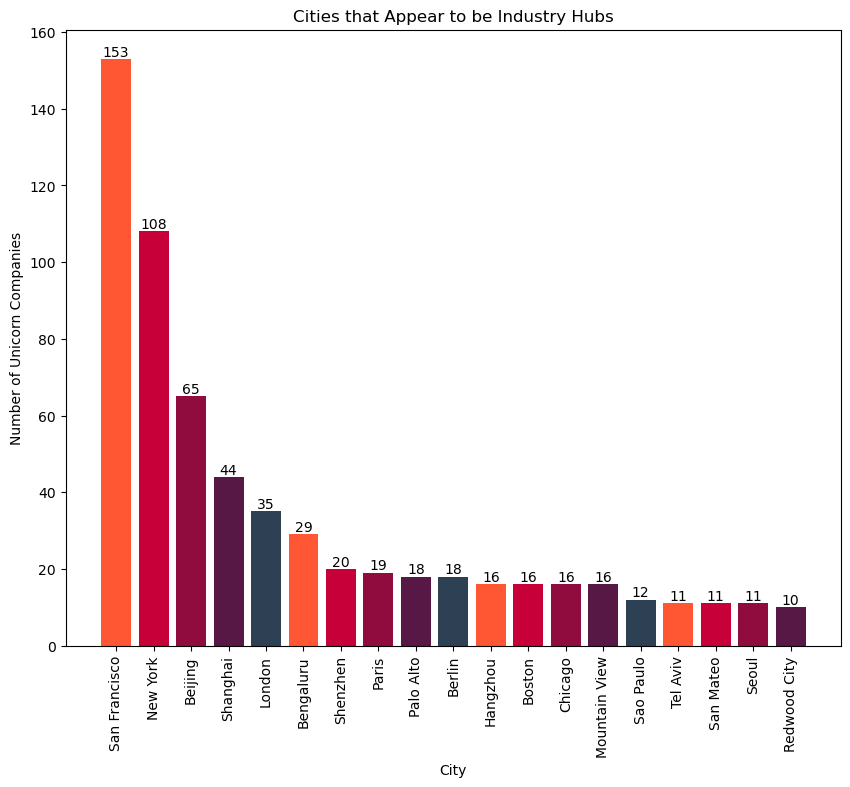

In [85]:
import matplotlib.pyplot as plt

# Plot a bar graph for the cities that appear to be industry hubs
plt.figure(figsize = (10,8))
plt.bar(high_unicorn_cities.index, high_unicorn_cities.values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')
plt.title('Cities that Appear to be Industry Hubs')
plt.xticks(rotation=90)
for i, count in enumerate(high_unicorn_cities.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Observation

- The above shows that there are certain cities that are industry hubs for unicorn companies, as they have a high number of such companies compared to other cities. The bar graph provides a clear and easy-to-understand visual representation of this distribution, with each bar representing a city and the height of the bar representing the number of unicorn companies in that city. San Francisco has the highest while Redwood City has the lowest.

## Which investors have funded the most unicorns?

In [86]:
investor_counts = df['Select Investors'].value_counts()
investor_counts

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
Advent International                                        2
                                                           ..
Trustbridge Partners, IDG Capital, Sequoia Capital China    1
K2VC, Lightspeed China Partners, Sky9 Capital               1
Automobile Industry Guidance Fund                           1
Trustbridge Partners, Hony Capital, IDG Capital             1
Novator Partners, True, Causeway Media Partners             1
Name: Select Investors, Length: 1058, dtype: int64

In [87]:
 # counting the top 5 investors who have funded the unicorns
print(investor_counts.head(5)) 

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
Advent International                                        2
Name: Select Investors, dtype: int64


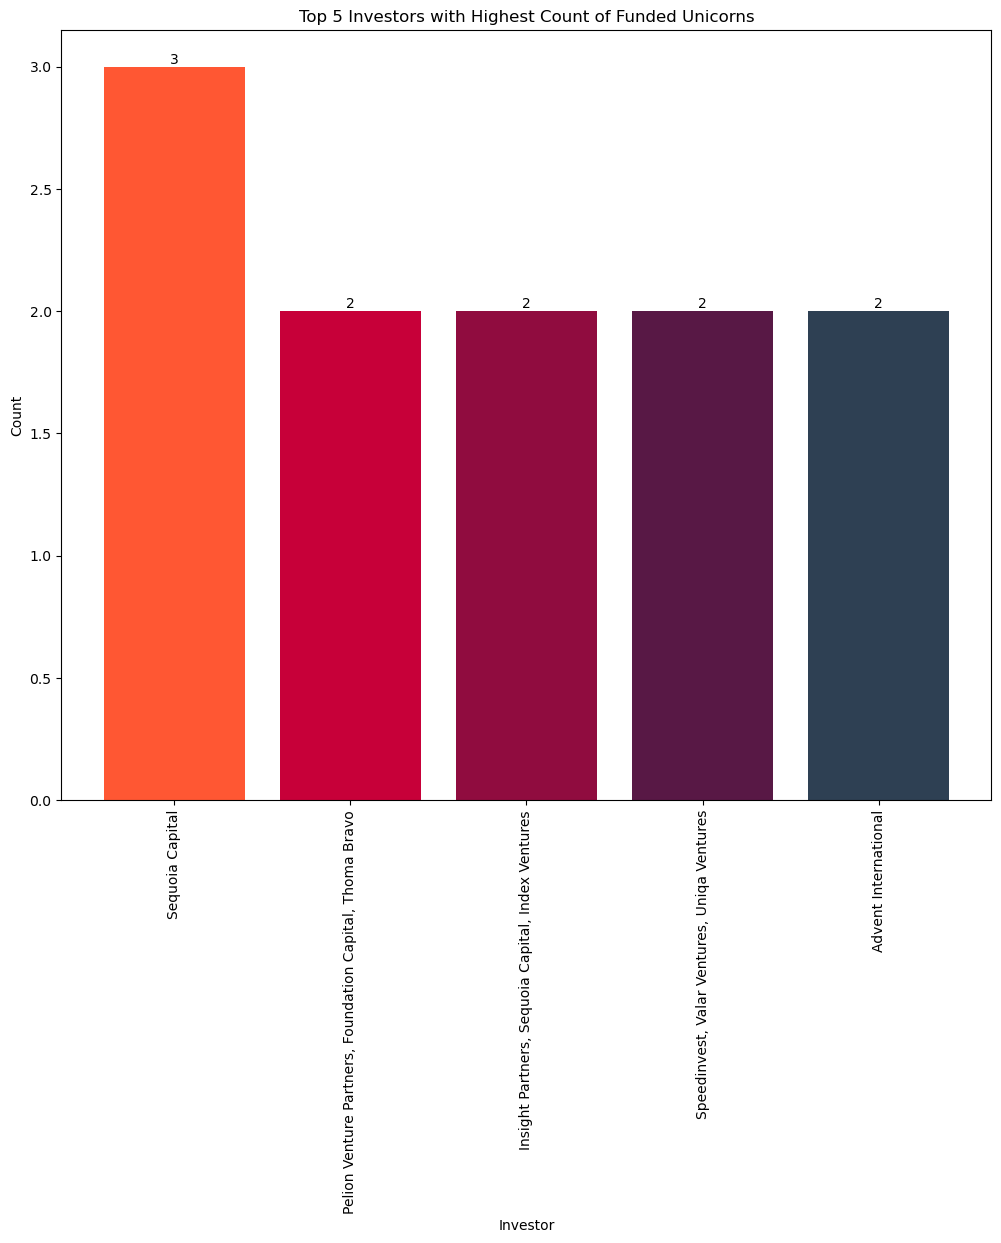

In [89]:
# Plotting the top 5 investors on a bar chart
plt.figure(figsize=(12, 10))
plt.bar(investor_counts.head(5).index, investor_counts.head(5).values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('Investor')
plt.ylabel('Count')
plt.title('Top 5 Investors with Highest Count of Funded Unicorns')
plt.xticks(rotation=90)
for i, count in enumerate(investor_counts.head(5).values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Observation

- Sequoia Capital has the highest count of funded Unicorns while the other 4 investors have equal amount of counts.

## RECOMMENDATION

- To improve their business and generate more revenue in unicorn companies, stakeholders can consider the following recommendations:

- Expand the Investor Network: Actively seek out and connect with a diverse range of investors. This can help attract more funding and support for growth initiatives.

- Foster Strategic Partnerships: Identify potential strategic partners that can provide complementary expertise, resources, or market access. Collaborating with strategic partners can enhance product offerings, expand customer reach, and drive revenue growth.

- Focus on Customer Acquisition and Retention: Implement targeted marketing and sales strategies to attract new customers and retain existing ones. This can involve personalized marketing campaigns, exceptional customer service, and continuous product improvement based on customer feedback.

- Invest in Research and Development: Allocate resources towards research and development efforts to innovate and stay ahead of market trends. Developing new products or enhancing existing ones can create additional revenue streams and maintain a competitive edge.

- Enhance Operational Efficiency: Streamline internal processes, optimize supply chain management, and leverage technology solutions to improve operational efficiency. This can reduce costs, increase productivity, and ultimately contribute to higher profit margins.

- Foster a Strong Company Culture: Cultivate a positive and inclusive company culture that attracts and retains top talent. A motivated and engaged workforce can drive innovation, productivity, and customer satisfaction, ultimately leading to increased revenue.

- Explore International Expansion: Assess opportunities for expanding into new markets or geographies. Conduct thorough market research, adapt to local preferences, and establish strategic partnerships to successfully enter new markets and tap into additional revenue sources.

- Continuously Monitor and Adapt: Regularly analyze market trends, customer preferences, and competitive landscape. Stay agile and adapt business strategies accordingly to capitalize on emerging opportunities and mitigate potential risks.



It is important for stakeholders to assess these recommendations based on their specific business context and industry dynamics. Implementing a combination of these strategies can help unicorn companies generate more revenue and achieve long-term success.